In [1]:
isogeny_offsets = [
    420168, # 420160 without if statements          
    572712, # 572724 without one if statement
    1105380,# 1105436 without one if statement
    1633020,# 1633100 without one if statement
    1793228,
    1946148,
    2369384,
    2530540,
    2683696,
    3109096,
    3349400,
    3772384,
    3933540,
    4086696,
    4512096,
    4752400,
    5175384,
    5336540,
    5489696,
    5915096,
    6155400,
    6578384,
    6739540,
    6892696,
    7318096,
    7558400,
    7995448,
    8128412, # 8128748 without one if statement
    8628592, # 8628944 without one if statement
    9130316, # 9130684 without one if statement
]

In [2]:
# With one if statement trigger branch makes it slower,
# since if the same if statement is in both branches, cpu
# computes the condition beforehand, and then opens gpio pin if
# it is met causing minimal number of clock cycles.
#
# As such I hypothesize, that without any trigger, actual offsets that are correct are in very close neighborhood to the measured ones, while the 
# 
# First isogeny with and without trigger if statements is just 8 cycles faster
# 
# So lets say before each isogeny, there is a condition computation which takes 8 cycles,
# meaning the offset at which isogeny gets skipped should be in close neighbourhood
# for i in range(NUM_ISOGENIES):
#     actual_offset[i] = offset[i] + i * 8 + 261

In [3]:
# i 5
# li7 572712
# i 5
# i 3
# i 5
# li7 1946148
# i 3
# i 5
# li7 2683696
# i 3
# li7 3772384
# i 3
# i 5
# li7 4512096
# i 3
# li7
# i 3
# i 5
# li7
# i 3
# li7
# i 3
# i 5
# li7
# i 3
# li7
# i 3
# i 5
# i 5
# i 5

In [1]:
pwd

'/home/xjaros2/Documents/git/csidh-setup/csidh-target/scripts'

In [58]:
from copy import deepcopy
import json
import pandas as pd
import seaborn as sns
from csidh.search import Unit

import os
os.chdir("/home/xjaros2/Documents/git/csidh-setup/csidh-target/scripts/")

def read_cachefile(filename):
    with open(filename, "r") as f:
        measurements = json.load(f)
    measurements = measurements["measurements"]
    result = []
    for i in range(len(measurements)):
        unit = Unit(repr=measurements[i]["unit"])
        measurements[i].update(unit.__dict__())
        unit.measurements = measurements[i]["measurements"]
        unit.responses = measurements[i]["responses"]
        del measurements[i]["index"]
        measurements[i]["unit"] = unit
        result.append(measurements[i])
    return result

def read_cachefiles_to_dataframe(cachefiles):
    df = None
    for filename in cachefiles:
        result = pd.DataFrame(read_cachefile(filename))
        if df is None:
            df = result
        else:
            df = pd.concat([df, result], ignore_index=True, sort=False)
    return df
        
        
        

husky = [
    # "./data/param-search/husky/cache-2025-03-04_19:02:50.272527.json",
    # "./data/param-search/husky/cache-2025-03-04_21:13:57.894910.json",
    # "./data/param-search/husky/cache-best-local-search-no-ext-offset.json",
    # "./data/param-search/husky/cache-isogeny-skip-search.json",
    #"./data/dummy-results/husky/cache-best-local-search-no-ext-offset.json",
    # "./data/dummy-results/husky/cache-best-local-search-with-ext_offset.json",
    # "./data/dummy-results/husky/cache-skips-100-tries-top5.json",
    #  "./data/param-search/husky/isogeny-tight-skip-search-00.json",
    #  "./data/dummy-results/husky/xISOG-5-isogeny-skip-test.json",
     "./husky-clock-xISOG-first-5-isogeny-skip-parameter-search.json",
    # "./husky-clock-xISOG-first-5-isogeny-skip-search.json",
    # "./husky-clock-xISOG-first-5-isogeny-skip-search-until7.json",
    "./husky-clock-param-search-random.json"
]

df = read_cachefiles_to_dataframe(husky)
df = df[(df["type"] != "NORMAL")].reset_index()
indices = [i  for i,x in enumerate(df["responses"]) if 199 in x]
potential_skips = df.iloc[indices]
potential_skips

,index,unit,responses,measurements,ext_offset,offset,width,repeat,type,fitness,offset_fine,width_fine
440,24838,"(ext_offset=1569093, offset=269, width=193, re...","[199, 199, 199]","[JUSTRIGHT, JUSTRIGHT, JUSTRIGHT]",1569093,269,193,10,JUSTRIGHT,10.0,None,None


<Axes: xlabel='repeat', ylabel='Count'>

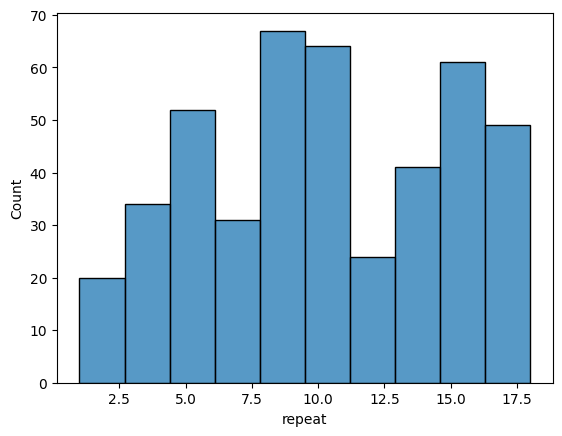

In [59]:
sns.histplot(df["repeat"])

<Axes: xlabel='offset', ylabel='width'>

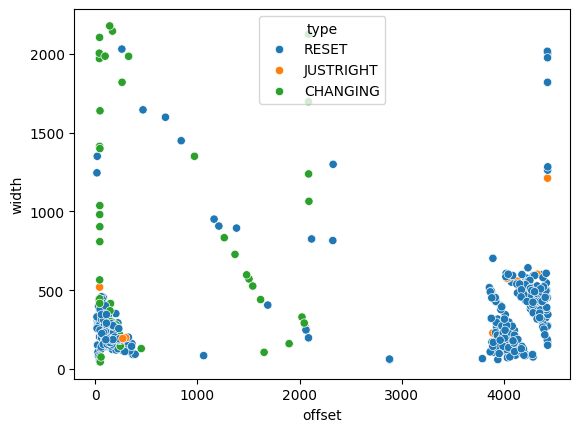

In [60]:
sns.scatterplot(df, x="offset", y="width", hue="type")

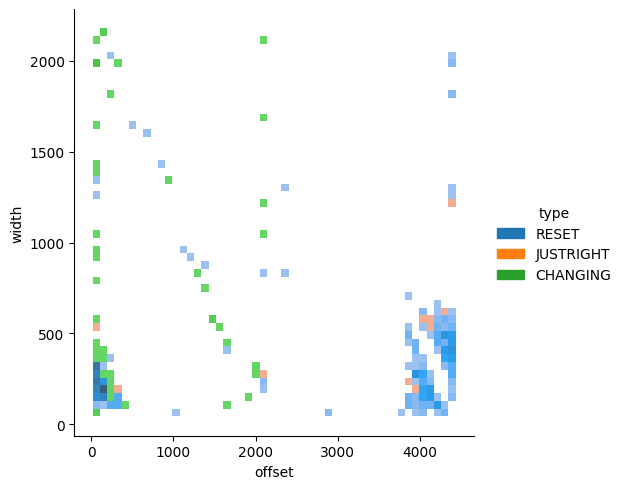

In [61]:
sns.displot(data=df, x="offset", y="width", hue='type', bins=50)

<Axes: xlabel='offset', ylabel='width'>

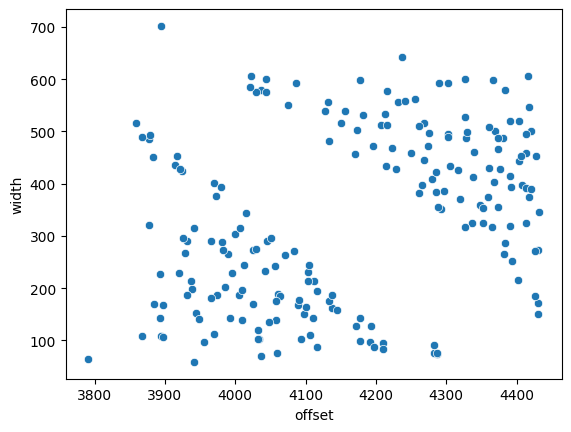

In [33]:
sns.scatterplot(df[(df["width"] < 750) & (df["offset"] > 3500)], x="offset", y="width")

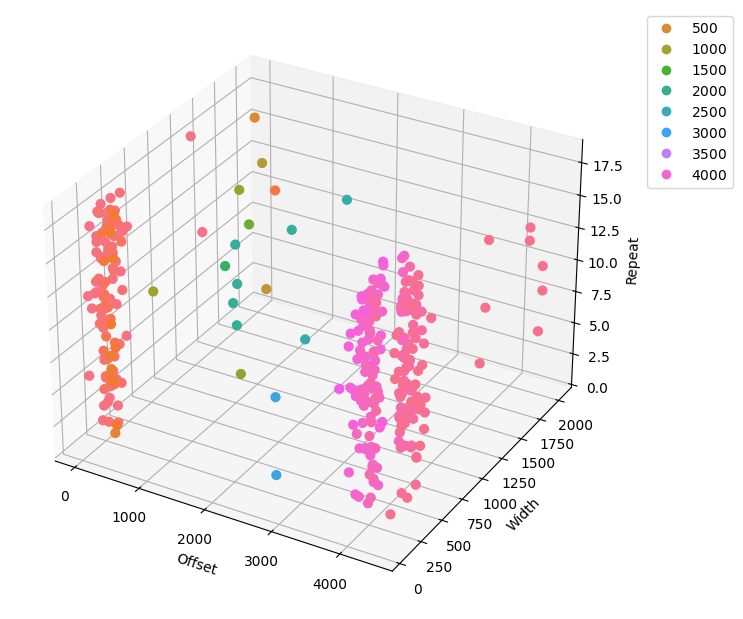

In [29]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = df["offset"]
y = df["width"]
z = df["repeat"]

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Offset')
ax.set_ylabel('Width')
ax.set_zlabel('Repeat')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [1]:
from csidh import CSIDHDLL
import os
PATH = "/home/xjaros2/Documents/git/csidh-setup/csidh-target/src/"
os.chdir(PATH)
csidhdll = CSIDHDLL(src_path=PATH)


def isogeny_in_distance(public, i):
    csidhdll.public = csidhdll.to_projective(public)
    private = [0, 0, 0]
    
    private[i] = -1
    csidhdll.private = private
    positive_isogeny_skipped =  csidhdll.from_projective(csidhdll.action())

    private[i] = 1
    csidhdll.private = private
    negative_isogeny_skipped = csidhdll.from_projective(csidhdll.action())
    return [positive_isogeny_skipped, negative_isogeny_skipped]

-- Configuring done (0.0s)
-- Generating done (0.0s)
-- Build files have been written to: /home/xjaros2/Documents/git/csidh-setup/csidh-target/src/build
[100%] Built target csidh


In [ ]:
batch = []
iso3_skips = []
iso5_skips = []
iso7_skips = []
for i in range(len(df.index)):
    hit = deepcopy(df.iloc[i])
    for public in isogeny_in_distance(0,0)[:1]:
        if public in hit["responses"]:
            hit[f"count-{public}"] = hit["responses"].count(public)
            iso3_skips.append(hit)
            break

    for public in isogeny_in_distance(0,1):
        if public in hit["responses"]:
            hit[f"count-{public}"] = hit["responses"].count(public)
            iso5_skips.append(hit)
            break

    for public in isogeny_in_distance(0,2)[:1]:
        if public in hit["responses"]:
            hit[f"count-{public}"] = hit["responses"].count(public)
            iso7_skips.append(hit)
            break
iso3_skips = pd.DataFrame(iso3_skips).reset_index()
iso5_skips = pd.DataFrame(iso5_skips).reset_index()
iso7_skips = pd.DataFrame(iso7_skips).reset_index()

In [ ]:
iso5_skips

In [10]:
for i in range(3):
    for j in range(3):
        for x in isogeny_in_distance(410, i):
            print(isogeny_in_distance(x, j))
    

[0, 410]
[410, 404]
[295, 390]
[6, 220]
[15, 144]
[9, 174]
[295, 6]
[390, 220]
[75, 410]
[410, 261]
[199, 344]
[413, 245]
[15, 9]
[144, 174]
[199, 413]
[344, 245]
[245, 410]
[410, 199]
